<h1>Bike Sharing Dataset using Linear Regressor

<B>This is Supervised problem as the output datasets are provided and I used this to predict the future outcomes of target variable.
    
This is regression problem as dependent variable i.e. Bike Rental Count is continuous values or ordered whole values. Regression means to predict the output value using training data.



<B>Based on Bike Sharing dataset from UCI Machine Learning Repository
This notebook is based upon the hourly data file, i.e. hour.csv
This notebook showcases regression using Decision Trees



<h3>Problem Statement

Given the Bike Sharing dataset with hourly level information of bikes along with weather, User type Registered/Casual and other attributes, model a system which can predict the bike count.

<h1> Import required packages

In [1]:
%matplotlib inline
# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
from scipy import stats
#import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [2]:
#Importing the dataset
stat = pd.read_csv('hour.csv')

In [3]:
#Shape of dataset
stat.shape

(17379, 17)

In [4]:
# top 3 rows from the dataset
stat.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


<h1> Preprocessing</h1>
<list>
<list>
Standarize column names
<list>
Typecast attributes
<list>
Encode Categoricals using One Hot Encoding

<h3> Standardize column names

In [5]:
stat.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

<h3> Typecast Attributes

In [6]:
#type casting the attributes
stat['datetime'] = pd.to_datetime(stat.datetime)#dae time conversion
# categorical variables
stat['season'] = stat.season.astype('category')
stat['is_holiday'] = stat.is_holiday.astype('category')
stat['weekday'] = stat.weekday.astype('category')
stat['weather_condition'] = stat.weather_condition.astype('category')
stat['is_workingday'] = stat.is_workingday.astype('category')
stat['month'] = stat.month.astype('category')
stat['year'] = stat.year.astype('category')
stat['hour'] = stat.hour.astype('category')

In [7]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
rec_id               17379 non-null int64
datetime             17379 non-null datetime64[ns]
season               17379 non-null category
year                 17379 non-null category
month                17379 non-null category
hour                 17379 non-null category
is_holiday           17379 non-null category
weekday              17379 non-null category
is_workingday        17379 non-null category
weather_condition    17379 non-null category
temp                 17379 non-null float64
atemp                17379 non-null float64
humidity             17379 non-null float64
windspeed            17379 non-null float64
casual               17379 non-null int64
registered           17379 non-null int64
total_count          17379 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)
memory usage: 1.3 MB


<h1> Creating Feature & Target Arrays

In [8]:
X = stat.iloc[:, 2:-1].values
#X = X.reset_index(inplace=True)
y = stat.iloc[:, 16].values
#y = y.reset_index()

In [9]:
type (X)

numpy.ndarray

In [10]:
type (y)

numpy.ndarray

<h1> Predicting House Value from Single Feature say User Type 'Registered'

In [11]:
y = y.reshape(-1,1)

X_registered = np.array(stat.iloc[:,15:-1])
X_registered = X_registered.reshape(-1,1)

In [12]:
type(y)
type(X_registered)
X_registered.shape

(17379, 1)

In [13]:
y.shape

(17379, 1)

<h1> Plotting Bike Rental Count vs. Registered User Type

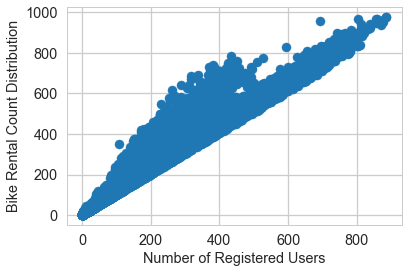

In [14]:
plt.scatter(X_registered, y)
plt.xlabel('Number of Registered Users')
plt.ylabel('Bike Rental Count Distribution')
plt.show()

<b> Scatter plot shows direct positive linear relationship between Bike Rental Count distribution with Registered User Types

<h1> Fitting a Regression Model

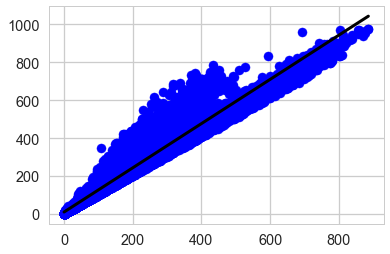

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_registered, y)
prediction_space = np.linspace(min(X_registered), max(X_registered)).reshape(-1,1)
plt.scatter(X_registered, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth = 3)
plt.show()

<H1> Linear regression on all Features

In [16]:
X, X_test, y, y_test = train_test_split(stat.iloc[:,2:-1], stat.iloc[:,16], 
                                                    test_size=0.33, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X, y)
y_pred = reg_all.predict(X_test)

In the world of Classification ML algorithms, Accuracy was the way to measure Model Performance.
The default scoring mechanism for Linear REgression is R2. This metric quantifies the amount of variance in the target variable that is predicted from the feautre variable.

In [84]:
print(y_pred)

[[1.2830e+04 4.2500e+02]
 [8.6880e+03 8.8000e+01]
 [7.0910e+03 4.0000e+00]
 ...
 [8.1900e+02 1.6100e+02]
 [1.5323e+04 6.3400e+02]
 [7.5900e+03 1.1600e+02]]


In [17]:
reg_all.score(X_test, y_test)

1.0

However we may not use Linear Regression out of the box like this, we may use REgularization which places further constraints on model coefficients.

<H1> Cross Validation 5-folds

To avoid the prediction of target variable by the split % of train & test data, Cross validation method is introduced to group the data into 5(or K) folds and performing train-test split & prediction on each fold iteratively and we predict the value of R2 5 times. Then from here we may compute Mean, Median or 95% Confidence Interval. 

In [95]:
from sklearn.model_selection import cross_val_score
#reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg_all.fit(X,y), X_test, y_test, cv= 5)
print(cv_results)

[1. 1. 1. 1. 1.]


In [96]:
np.mean(cv_results)

1.0

In [97]:
r2_scores = cross_val_score(reg_all.fit(X,y), X_test, y_test, cv=10)
mse_scores = cross_val_score(reg_all.fit(X,y), X_test, y_test, cv=10,scoring='neg_mean_squared_error')

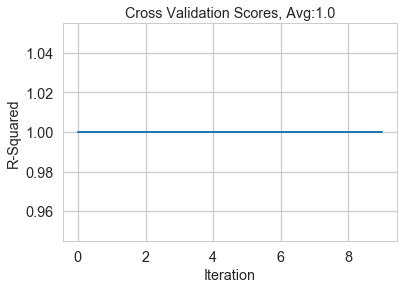

In [92]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [94]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MSE::[-2.72642416e-22 -3.15717724e-22 -2.67918508e-22 -2.75222482e-22
 -2.60154963e-22 -2.80385994e-22 -2.32895160e-22 -3.07112486e-22
 -3.26923209e-22 -2.85166876e-22]


<H1> Regularized Ridge Regression in Scikit-Learn

In [20]:
from sklearn.linear_model import Ridge
X, X_test, y, y_test = train_test_split(stat.iloc[:,2:-1], stat.iloc[:,16], 
                                                    test_size=0.33, random_state=42)

ridge = Ridge(alpha =0.1, normalize=True)
ridge.fit(X, y)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.9925452586892957

<h1> Lasso Regression in Scikit-Learn

In [21]:
from sklearn.linear_model import Lasso
X, X_test, y, y_test = train_test_split(stat.iloc[:,2:-1], stat.iloc[:,16], 
                                                    test_size=0.33, random_state=42)

lasso = Lasso(alpha =0.1, normalize=True)
lasso.fit(X, y)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
#print(y.shape)

0.9952422250383618

<h1> Lasso for Feature Selectio in Scikit-Learn

In [22]:
from sklearn.linear_model import Lasso
names = stat.drop('total_count', axis = 1).columns
lasso = Lasso(alpha=0.1)

print(X.shape)
print(y.shape)

(11643, 14)
(11643,)


In [29]:
X.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y.reset_index()
y_test.reset_index()
print(y.head(10))

5749      64
1843     106
13855    491
9723       4
10981    567
1285     183
16759      9
4303       1
6366     238
1941     248
Name: total_count, dtype: int64


In [30]:
print(y.shape)

(11643,)


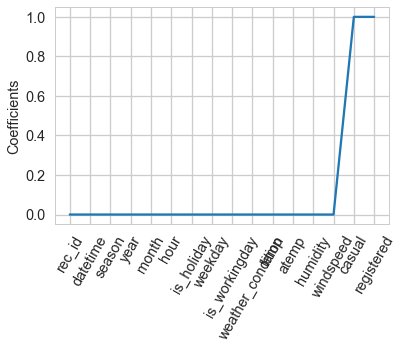

In [31]:
lasso_coef = lasso.fit(X,y).coef_
_=plt.plot(range(len(names)), lasso_coef)
_=plt.xticks(range(len(names)), names, rotation = 60)
_=plt.ylabel('Coefficients')
plt.show()

From the above graph, I see user type Casual and Registered are highest predictor of Bike Rental Count distribution for any period of time.

<h1> How Good is your Model

<B>Hyperparameter Tuning 

This involves following steps:
    <br>Linear Regression: Choosing parameters
    <br>Ridge/Lasso Regression: Choosing alpha
    <br>k-Nearest Neighbors: Choosing n_neighbors
    <br>Parameters like alpha & k: Hyperparameters
    <br>Hyperparameters can not be learned by fitting the model

Choosing the correct hyperparameter of above mentioned methods is called Hyperparameter tuning & here are the steps:
<br> Try different hyperparameter values
<br> Fit all of them separately
<br> See how well each performs
<br> Choose the best performing one
<br> Essential to use cross validation

When we have combination of hyperparameters to tune like C & alpha, then grid search cross validation class is used.

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves two purposes here:
Convenience and encapsulation
You only have to call fit and predict once on your data to fit a whole sequence of estimators.
Joint parameter selection
You can grid search over parameters of all estimators in the pipeline at once.
Safety
Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.
All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.
E.g. # Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)


Centering & Scaling: This may be required say in regression models where fetures on far larger scales may unduly influennce the model so need to normalize the data. E.g. subtract the mean & divide by zero.

ElasticNet:  in the fitting of linear or logistic regression models, the elastic net is a regularized regression method (regularization is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting)that linearly combines the L1 and L2 penalties of the lasso and ridge methods.
The elastic net method overcomes the limitations of the LASSO (least absolute shrinkage and selection operator) method which uses a penalty function based on

‖
β
‖
1
=
∑
j
=
1
p
|
β
j
|
.
\|\beta\|_1 = \textstyle \sum_{j=1}^p |\beta_j|.
Use of this penalty function has several limitations.[1] For example, in the "large p, small n" case (high-dimensional data with few examples), the LASSO selects at most n variables before it saturates. Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others. To overcome these limitations, the elastic net adds a quadratic part to the penalty (
‖
β
‖
2
\|\beta\|^2), which when used alone is ridge regression (known also as Tikhonov regularization). The estimates from the elastic net method are defined by

β
^
≡
argmin
β
(
‖
y
−
X
β
‖
2
+
λ
2
‖
β
‖
2
+
λ
1
‖
β
‖
1
)
.
{\displaystyle {\hat {\beta }}\equiv {\underset {\beta }{\operatorname {argmin} }}(\|y-X\beta \|^{2}+\lambda _{2}\|\beta \|^{2}+\lambda _{1}\|\beta \|_{1}).}
The quadratic penalty term makes the loss function strictly convex, and it therefore has a unique minimum. The elastic net method includes the LASSO and ridge regression

l1_ratio : float or array of floats, optional
float between 0 and 1 passed to ElasticNet (scaling between l1 and l2 penalties). For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2 This parameter can be a list, in which case the different values are tested by cross-validation and the one giving the best prediction score is used. Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1]

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Setup the pipeline steps: steps with scaling
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(stat.iloc[:,2:-1], stat.iloc[:,16], test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.999959716916


elasticnet__l1_ratio: 1.0 proves the model better optimized and closer to Lasso regression model than Ridge.

<h1> ONE HOT ENCODING - The Categorical Features

In [38]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

<h1> Train-Test Split

In [39]:
X, X_test, y, y_test = train_test_split(stat.iloc[:,2:-1], stat.iloc[:,16], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [40]:
#np.array(stat.iloc[:,2:-1])
#list(stat.iloc[:,16])

In [41]:
y_test

,index,total_count
0,12830,425
1,8688,88
2,7091,4
3,12230,526
4,431,13
5,1086,32
6,11605,706
7,7983,26
8,10391,2
9,7046,21


In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#Predicting the Test Set results
y_pred = regressor.predict(X_test)

In [46]:
X.iloc[:, -2]

0          6
1         21
2        161
3          0
4        299
5         53
6          0
7          0
8         17
9        118
10         1
11         1
12         8
13         0
14        36
15        27
16         3
17        43
18        14
19        71
20         1
21        11
22        79
23         2
24         9
25        11
26         6
27        18
28        69
29         0
        ... 
11613    219
11614      2
11615      9
11616      0
11617      4
11618      2
11619      3
11620      1
11621      0
11622     45
11623     10
11624      0
11625      6
11626     23
11627      1
11628      3
11629      8
11630      9
11631      7
11632     19
11633     10
11634      2
11635     36
11636     10
11637      9
11638     30
11639    124
11640     26
11641      3
11642     33
Name: casual, Length: 11643, dtype: int64

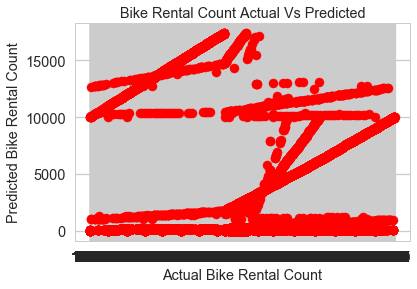

In [49]:
# Visualizing the Training set results
plt.scatter(y_test, y_pred, color = 'red')
#plt.plot(y_test, y_pred, color = 'blue')
plt.title('Bike Rental Count Actual Vs Predicted')
plt.xlabel('Actual Bike Rental Count')
plt.ylabel('Predicted Bike Rental Count')
plt.show()

<h1> Normality Test

scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)[source]
Calculate quantiles for a probability plot, and optionally show the plot.

Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

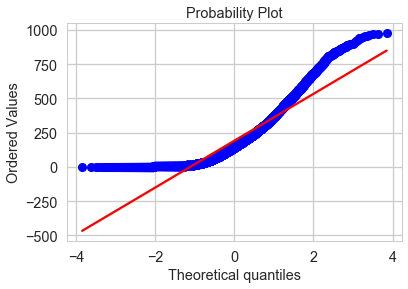

In [50]:
stats.probplot(y.iloc[:, 1], dist="norm", plot=plt)
plt.show()

In [51]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year', 'registered', 'casual']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [52]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [53]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 21)


In [54]:
print (y)

       index  total_count
0       5749           64
1       1843          106
2      13855          491
3       9723            4
4      10981          567
5       1285          183
6      16759            9
7       4303            1
8       6366          238
9       1941          248
10     16397           83
11      1091            7
12      6891          140
13        73            4
14      3397          160
15     14067          618
16      8604           95
17      4192          160
18     14875           45
19     14488          303
20      9149           21
21      5064           77
22      4387          596
23     17126          267
24     16539          181
25     12560           59
26     10269           94
27     14106          138
28     13139          369
29      7882            5
...      ...          ...
11613  14502          492
11614   8838            5
11615   3890           47
11616   3556            6
11617  11394           73
11618   1267           39
11619   1899